## Import libraries

In [1]:
!pip install feature-engine lightgbm xgboost catboost==0.25.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers, models
from keras.applications import vgg16 as vgg
from tensorflow.keras.utils import load_img, img_to_array, to_categorical
import matplotlib.pyplot as plt
import os
from glob import glob
from sklearn.model_selection import train_test_split
import random
import cv2
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import matplotlib.image as mpimg
from keras.preprocessing import image
from keras.models import Model, Sequential
from keras.layers import Dense, Flatten
from tensorflow.keras import Sequential
from tensorflow.math import confusion_matrix
from tensorflow.keras.layers import Conv1D, BatchNormalization, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

import pandas as pd
import numpy as np
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.model_selection import cross_validate
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from sklearn.preprocessing import StandardScaler
from feature_engine.imputation import ArbitraryNumberImputer, MeanMedianImputer
from feature_engine.imputation import CategoricalImputer
from feature_engine.encoding import OneHotEncoder
from feature_engine.wrappers import SklearnTransformerWrapper
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import GridSearchCV

SEED = 42

# Reading ABT and Rename Variables

In [3]:
# Read Google Drive 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# Read abt

df = pd.read_csv('/content/drive/My Drive/TCC_FIA_IA/base_abt_modelagem.csv', index_col=0)
df

,Item,venfis,venfin,itens,itens_dist,datas,estoque,recencia,revendeu_prox_mes,ref_prev
0,-,3,127.50,1,1,28.0,0.0,156,0,2021-09-01
1,11ER030M D=3,3,27.52,1,1,28.0,0.0,113,0,2021-09-01
2,11ER040M D=4,10,27.52,1,1,28.0,0.0,113,0,2021-09-01
3,11ER060M D=6,10,27.52,1,1,28.0,0.0,113,0,2021-09-01
4,11IRAG60 (RT11 01NA60 YBG205),10,44.82,1,1,28.0,0.0,6,0,2021-09-01
...,...,...,...,...,...,...,...,...,...,...
2648,XNGU100408ERML WU10PM,10,40.00,1,1,28.0,0.0,180,0,2022-02-01
2649,XNGU100408ERML WU10PM,20,46.62,1,1,35.0,20.0,267,0,2022-02-01
2650,XNGU100408ERML WU10PM,10,29.43,1,1,28.0,40.0,316,0,2022-02-01
2651,XNGU15T608ERALP WN25PM,10,125.00,1,1,35.0,0.0,313,0,2022-02-01


In [17]:
may = pd.read_csv('/content/drive/My Drive/TCC_FIA_IA/base_teste_marco.csv', index_col=0)

In [5]:
# Rename variables

key_vars = ['ref_prev', 'Item']

num_vars = ['venfis', 'venfin', 'itens', 'itens_dist', 'datas', 'estoque', 'recencia']

target = 'revendeu_prox_mes'

cat_vars = []

features = num_vars+cat_vars

In [34]:
# function to smote data -> unbalanced data

def balancear_dados(X_train, y_train, random_state = 42, n_jobs = -1, sampling_strategy = 'all', k_neighbors = 1):
    global X_res, y_res
    sm = SMOTE(random_state = random_state, n_jobs = n_jobs, sampling_strategy = sampling_strategy, k_neighbors = k_neighbors)
    X_res, y_res = sm.fit_resample(X_train, y_train)
   # y_res = to_categorical(y_res, 2)
    return X_res, y_res

In [35]:
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)

In [36]:
X = df[features]
y = df[target]

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, stratify = y)

In [38]:
X_res, y_res = balancear_dados(X_train = X_train, y_train = y_train)

In [39]:
catboost = Pipeline(steps = [
    ('catboost', CatBoostClassifier(depth = 8,
                           random_state = 42, 
                           learning_rate = 0.03,
                           n_estimators = 1600
                           ))
]
)

catboost.fit(X_res, y_res)
skf = StratifiedKFold(n_splits = 5, shuffle=True, random_state = 42)
cv_results = cross_validate(estimator = catboost, X = X_res, y = y_res, scoring = ['accuracy', 'precision', 'recall', 'f1', 'roc_auc'], cv = skf, n_jobs=-1)

0:	learn: 0.6808804	total: 15ms	remaining: 24s
1:	learn: 0.6722769	total: 25.1ms	remaining: 20s
2:	learn: 0.6617844	total: 37.9ms	remaining: 20.2s
3:	learn: 0.6537693	total: 51.1ms	remaining: 20.4s
4:	learn: 0.6445111	total: 64.6ms	remaining: 20.6s
5:	learn: 0.6362091	total: 77.6ms	remaining: 20.6s
6:	learn: 0.6286134	total: 90.9ms	remaining: 20.7s
7:	learn: 0.6201848	total: 104ms	remaining: 20.7s
8:	learn: 0.6131772	total: 117ms	remaining: 20.7s
9:	learn: 0.6077557	total: 131ms	remaining: 20.9s
10:	learn: 0.6024023	total: 145ms	remaining: 20.9s
11:	learn: 0.5974947	total: 168ms	remaining: 22.2s
12:	learn: 0.5915660	total: 181ms	remaining: 22.1s
13:	learn: 0.5877838	total: 194ms	remaining: 22s
14:	learn: 0.5826347	total: 207ms	remaining: 21.9s
15:	learn: 0.5786374	total: 224ms	remaining: 22.1s
16:	learn: 0.5750918	total: 237ms	remaining: 22.1s
17:	learn: 0.5714173	total: 250ms	remaining: 22s
18:	learn: 0.5673311	total: 263ms	remaining: 21.9s
19:	learn: 0.5623546	total: 276ms	remaining:

In [40]:
y_pred = catboost.predict(X_test)
y_pred_prob = catboost.predict_proba(X_test)[:,1]

In [41]:
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f'RoC-AUC: {roc_auc:.4f}')

RoC-AUC: 0.7910


In [42]:
print(f'O recall é {recall_score(y_test, y_pred)}')
print(f'A precisão é {precision_score(y_test, y_pred)}')
print(f'A Acc é {accuracy_score(y_test, y_pred)}')

O recall é 0.4573304157549234
A precisão é 0.5529100529100529
A Acc é 0.8408396946564886


In [43]:
y_pred = catboost.predict(may[features])
y_pred_prob = catboost.predict_proba(may[features])[:,1]

In [44]:
roc_auc = roc_auc_score(may[target], y_pred_prob)
print(f'RoC-AUC: {roc_auc:.4f}')

RoC-AUC: 0.7119


In [45]:
print(f'O recall é {recall_score(may[target], y_pred)}')
print(f'A precisão é {precision_score(may[target], y_pred)}')
print(f'A Acc é {accuracy_score(may[target], y_pred)}')

O recall é 0.32684824902723736
A precisão é 0.450402144772118
A Acc é 0.7949385932266468


## Deep Learning

In [5]:
# Function to standardscale data
def preprocess(features, target, test_size1 = 0.2, test_size2 = 0.1):
    global X, y, X_train, y_train, X_test, y_test, X_valid, y_valid, y_test2
    X = features
    y = target
    
    # train and test
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size1, random_state=SEED)

    # validation data
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=test_size2, random_state=SEED)

    
    scaler = StandardScaler()
    # X_train para padronizar os dados, primeiro preciso jogar para o formato de matriz, e depois voltar para o padrão antigo, lembrando que tupla precisa
    # ser passado com o simbolo *(x, y, z)
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.fit_transform(X_test)
    X_valid = scaler.fit_transform(X_valid)
    y_train = np.array(to_categorical(y_train, 2))
    y_test2 = np.array(y_test)
    y_test = to_categorical(y_test, 2)
    y_valid = np.array(to_categorical(y_valid, 2))

    return X_train, y_train, X_test, y_test, X_valid, y_valid, y_test2

In [ ]:
X_train, y_train, X_test, y_test, X_valid, y_valid, y_test2 = preprocess(features = df[features], target = df[target])

In [ ]:
X_res, y_res = balancear_dados(X_train = X_train, y_train = y_train)

In [ ]:
# Function to stop model when there is no increase in auc metric
callback = tf.keras.callbacks.EarlyStopping(monitor='auc', patience=3)

In [ ]:
fitted_model = None
model = None
tf.keras.backend.clear_session()

In [ ]:
inits = X_train.shape[1]
model = Sequential()
model.add(Dense(X_train.shape[0], activation = 'relu', input_shape = (inits, )))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(40, activation = 'relu'))

model.add(Dense(2, activation = 'sigmoid'))




model.compile(
    loss = 'categorical_crossentropy',
    optimizer = 'adam',
    metrics = [tf.keras.metrics.AUC(from_logits=True)])


model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 11786)             94288     
                                                                 
 dense_1 (Dense)             (None, 512)               6034944   
                                                                 
 dense_2 (Dense)             (None, 40)                20520     
                                                                 
 dense_3 (Dense)             (None, 2)                 82        
                                                                 
Total params: 6,149,834
Trainable params: 6,149,834
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(
    X_res,
    y_res,
    epochs = 150,
    verbose = 1,
    validation_data = (X_valid, y_valid),
    use_multiprocessing=True,
    callbacks = [callback]
)

Epoch 1/150
609/609 [==============================] - 7s 5ms/step - loss: 0.6184 - auc: 0.7148 - val_loss: 0.5806 - val_auc: 0.7585
Epoch 2/150
609/609 [==============================] - 3s 4ms/step - loss: 0.5998 - auc: 0.7342 - val_loss: 0.4934 - val_auc: 0.8410
Epoch 3/150
609/609 [==============================] - 3s 4ms/step - loss: 0.5969 - auc: 0.7366 - val_loss: 0.5668 - val_auc: 0.7749
Epoch 4/150
609/609 [==============================] - 3s 4ms/step - loss: 0.5917 - auc: 0.7402 - val_loss: 0.5360 - val_auc: 0.7839
Epoch 5/150
609/609 [==============================] - 3s 5ms/step - loss: 0.5900 - auc: 0.7408 - val_loss: 0.6245 - val_auc: 0.7026
Epoch 6/150
609/609 [==============================] - 3s 4ms/step - loss: 0.5874 - auc: 0.7410 - val_loss: 0.5974 - val_auc: 0.7168
Epoch 7/150
609/609 [==============================] - 3s 4ms/step - loss: 0.5844 - auc: 0.7400 - val_loss: 0.5767 - val_auc: 0.7456
Epoch 8/150
609/609 [==============================] - 3s 4ms/step - 

In [ ]:
y_pred = np.argmax(model.predict(X_test), axis = 1)
y_pred

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
score = model.evaluate(X_valid, y_valid, verbose = 0)
print('Test loss - Validation data', score[0])
print('Test AUC - Validation data', score[1])

Test loss - Validation data 0.6472289562225342
Test AUC - Validation data 0.7262132167816162


In [ ]:
print(classification_report(y_test2, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.77      0.84      2189
           1       0.36      0.65      0.46       431

    accuracy                           0.75      2620
   macro avg       0.64      0.71      0.65      2620
weighted avg       0.82      0.75      0.77      2620



In [ ]:
y_pred2 = model.predict(X_test)[:,1]
print(metrics.roc_auc_score(y_test2, y_pred2))
print(accuracy_score(y_test2, y_pred))

0.7645642258964088
0.748854961832061


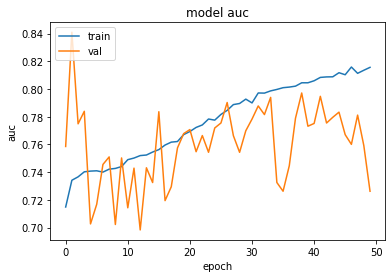

In [ ]:
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model auc')
plt.ylabel('auc')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

# Processing other month (May)

In [ ]:
def prepare_data(features, target, test_size1 = 0.2, test_size2 = 0.1):
    global X, y
    X = features
    y = target
    
    scaler = StandardScaler()
    # X_train para padronizar os dados, primeiro preciso jogar para o formato de matriz, e depois voltar para o padrão antigo, lembrando que tupla precisa
    # ser passado com o simbolo *(x, y, z)
    X = scaler.fit_transform(X)
    y_real_test = np.array(y)
    y = np.array(to_categorical(y, 2))

    return X, y, y_real_test

In [ ]:
X, y, y_real_test = prepare_data(features = may[features], target = may[target])

In [ ]:
y_pred = np.argmax(model.predict(X), axis = 1)
y_pred

array([1, 0, 0, ..., 1, 0, 1])

In [ ]:
print(classification_report(y_real_test, y_pred))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      2173
           1       0.32      0.51      0.40       514

    accuracy                           0.70      2687
   macro avg       0.59      0.63      0.60      2687
weighted avg       0.76      0.70      0.72      2687



In [ ]:
y_pred2 = model.predict(X)[:,1]
print(metrics.roc_auc_score(y_real_test, y_pred2))

0.6583069363840984


In [ ]:
confusion = confusion_matrix(labels=y_real_test, predictions=y_pred, num_classes=2)
confusion

<tf.Tensor: shape=(2, 2), dtype=int32, numpy=
array([[1619,  554],
       [ 251,  263]], dtype=int32)>